# <b>The Sparks Foundation<br>
#GRIPSEPTEMBER21<br>
Task: EDA on SampleSuperstore dataset<br>
dataset link:https://drive.google.com/file/d/1lV7is1B566UQPYzzY8R2ZmOritTW299S/view <br>
Data Scientist : Mahebub Beniwale</b>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("SampleSuperstore.csv")
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [3]:
df.shape

(9994, 13)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [5]:
df.isna().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [6]:
df.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

In [7]:
df.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Postal Code,9994.0,55190.379428,32063.693350,1040.000,23223.00000,56430.5000,90008.000,99301.000
Sales,9994.0,229.858001,623.245101,0.444,17.28000,54.4900,209.940,22638.480
Quantity,9994.0,3.789574,2.225110,1.000,2.00000,3.0000,5.000,14.000
Discount,9994.0,0.156203,0.206452,0.000,0.00000,0.2000,0.200,0.800
Profit,9994.0,28.656896,234.260108,-6599.978,1.72875,8.6665,29.364,8399.976


# Univariate Analysis

<AxesSubplot:xlabel='Ship Mode', ylabel='count'>

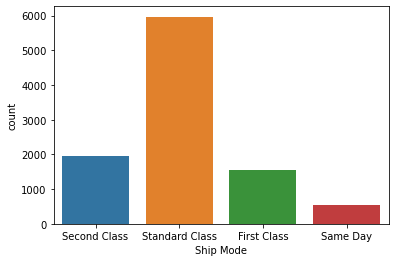

In [9]:
sns.countplot(x="Ship Mode",data=df)

Most People prefer 'Standard Class' ship mode.

<AxesSubplot:xlabel='Segment', ylabel='count'>

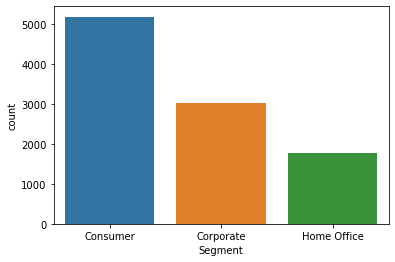

In [10]:
sns.countplot(x="Segment",data=df)

Our most customers are consumer type.

In [11]:
df["Country"].value_counts()

United States    9994
Name: Country, dtype: int64

our data is only for United States constomers.

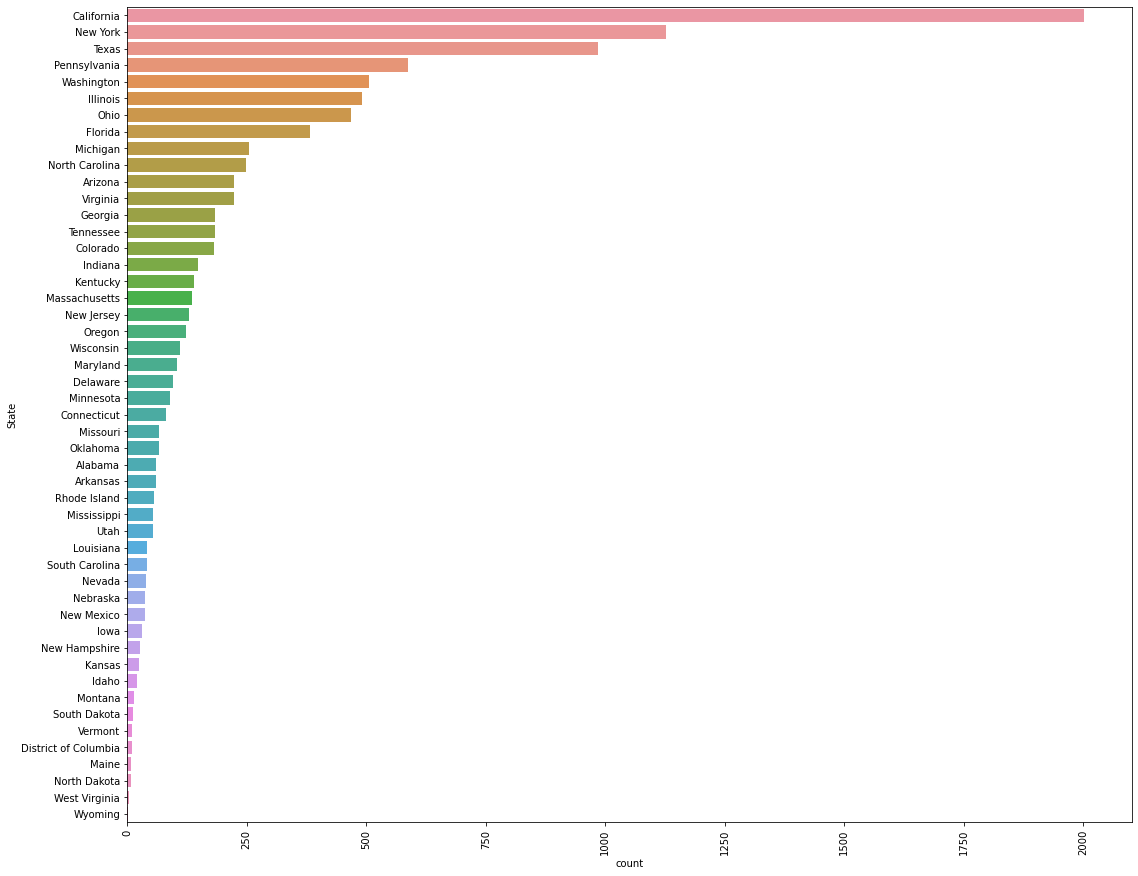

In [12]:
fig=plt.figure(figsize=(18,15)) 
sns.countplot(y='State',data=df,order=df['State'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

Most customers are from states: California, New York, Texas.

In [13]:
df["City"].value_counts().head(20)

New York City    915
Los Angeles      747
Philadelphia     537
San Francisco    510
Seattle          428
Houston          377
Chicago          314
Columbus         222
San Diego        170
Springfield      163
Dallas           157
Jacksonville     125
Detroit          115
Newark            95
Richmond          90
Jackson           82
Columbia          81
Aurora            68
Phoenix           63
Long Beach        61
Name: City, dtype: int64

Most customers from cities: New York city, Los Angeles, Philadelphia and San Francisco 

In [14]:
df["Postal Code"].value_counts().head(20)

10035    263
10024    230
10009    229
94122    203
10011    193
94110    166
98105    165
19134    160
98103    151
90049    151
19140    150
94109    141
90045    140
90036    122
43229    120
90004    117
77041    117
19143    114
19120    113
98115    112
Name: Postal Code, dtype: int64

Customers from postal code 10035, 10024, 10009, 94122 are our most frequent buyers.<br>

<AxesSubplot:xlabel='Region', ylabel='count'>

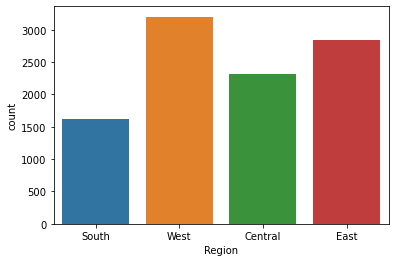

In [15]:
sns.countplot(x="Region",data=df)

From south we have least buyers.

<AxesSubplot:xlabel='Category', ylabel='count'>

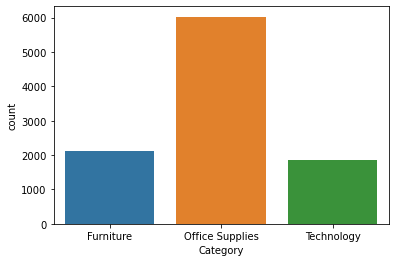

In [16]:
sns.countplot(x="Category",data=df)

Office supplies kinds of products are ordered most.

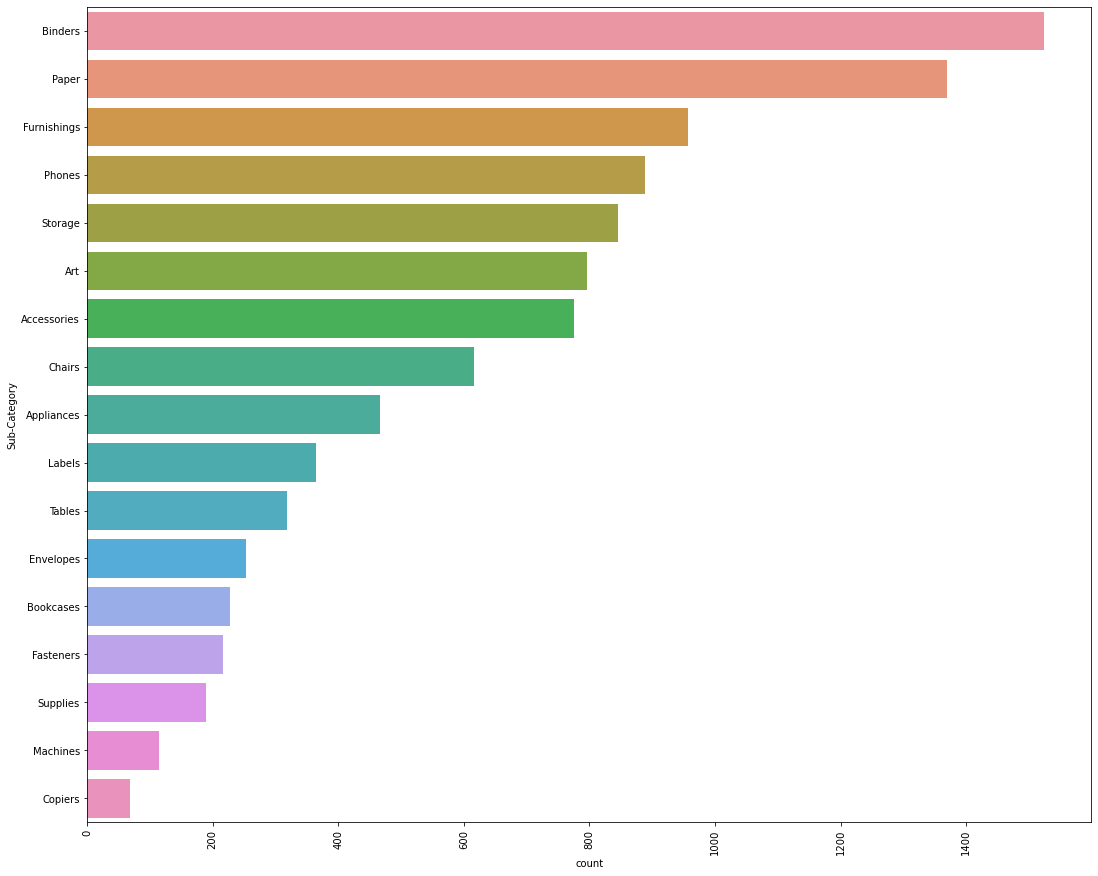

In [17]:
fig=plt.figure(figsize=(18,15)) 
sns.countplot(y='Sub-Category',data=df,order=df['Sub-Category'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:xlabel='Quantity', ylabel='count'>

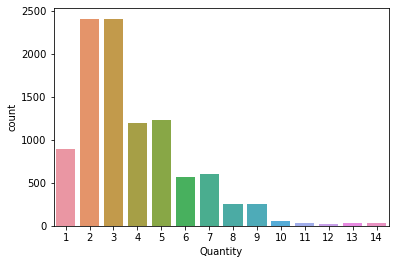

In [18]:
sns.countplot(x="Quantity",data=df)

Most customers prefer to buy two or three items together. 

In [19]:
df["Sales"].sort_values(ascending=False).head(10)

2697    22638.480
6826    17499.950
8153    13999.960
2623    11199.968
4190    10499.970
9039     9892.740
4098     9449.950
4277     9099.930
8488     8749.950
6425     8399.976
Name: Sales, dtype: float64

Above are the Top Sales of Store. 

In [20]:
df["Profit"].sort_values(ascending=False).head(10)

6826    8399.9760
8153    6719.9808
4190    5039.9856
9039    4946.3700
4098    4630.4755
2623    3919.9888
509     3177.4750
8488    2799.9840
7666    2591.9568
6520    2504.2216
Name: Profit, dtype: float64

Above are the Top Profits of Store. 

array([[<AxesSubplot:title={'center':'Postal Code'}>,
        <AxesSubplot:title={'center':'Sales'}>],
       [<AxesSubplot:title={'center':'Quantity'}>,
        <AxesSubplot:title={'center':'Discount'}>],
       [<AxesSubplot:title={'center':'Profit'}>, <AxesSubplot:>]],
      dtype=object)

<Figure size 720x720 with 0 Axes>

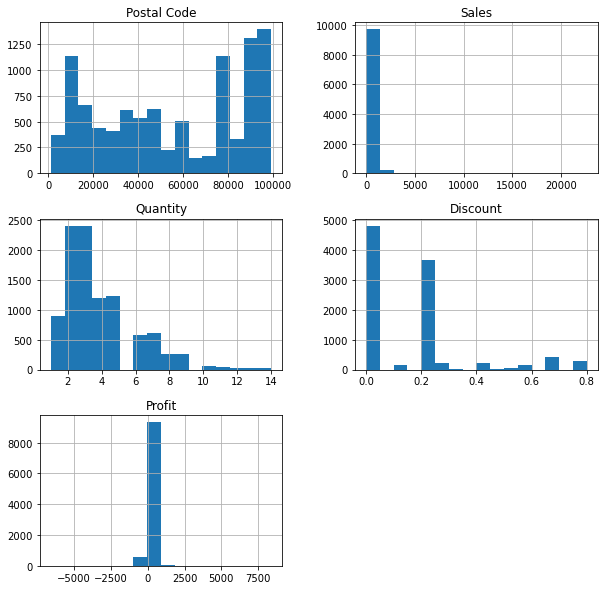

In [21]:
#ploting all the numerical columns
plt.figure(figsize=(10,10))
df.hist(bins=16, figsize=(10,10))

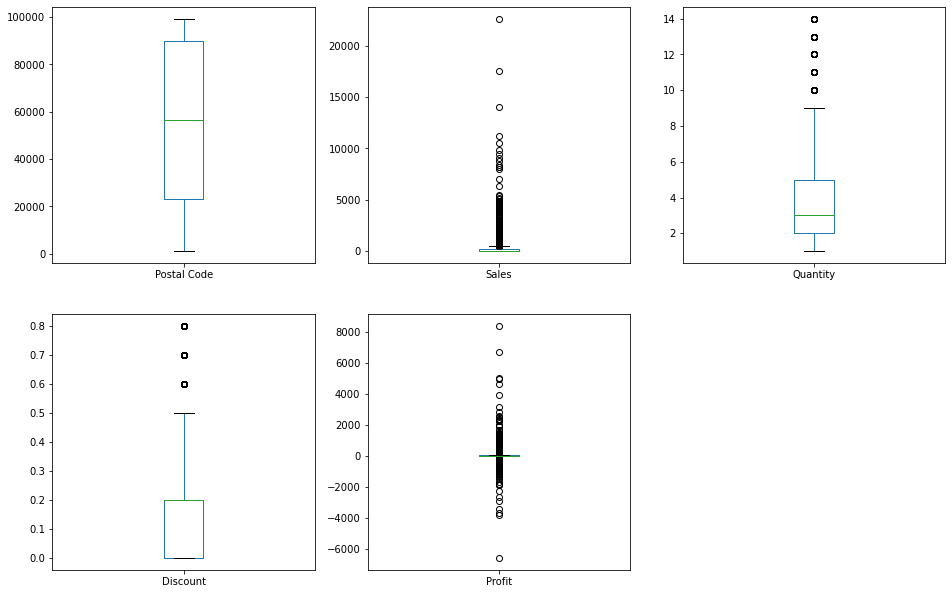

In [22]:
#box plot
df.plot(kind='box', figsize=(16,16), layout=(3,3), sharex=False, subplots=True);

<AxesSubplot:xlabel='Profit', ylabel='Density'>

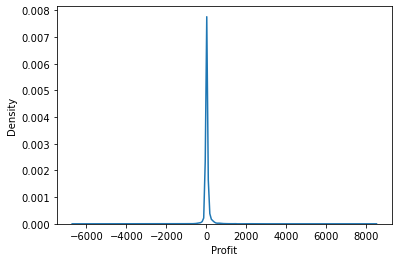

In [23]:
sns.kdeplot(df["Profit"])

<AxesSubplot:xlabel='Sales', ylabel='Density'>

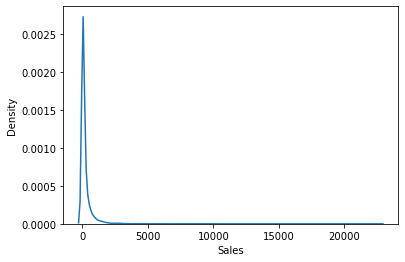

In [24]:
sns.kdeplot(df["Sales"])

<AxesSubplot:xlabel='Quantity', ylabel='Density'>

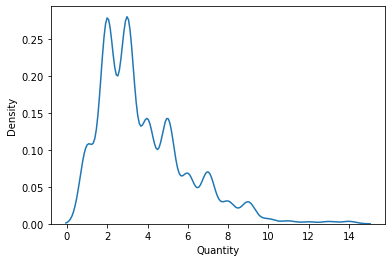

In [25]:
sns.kdeplot(df["Quantity"])

# Bivariate Analysis

<AxesSubplot:xlabel='Sales', ylabel='Profit'>

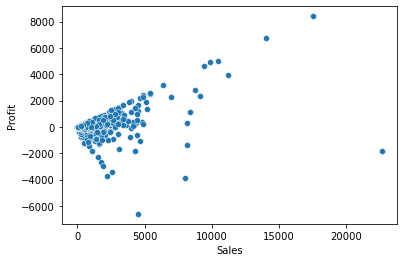

In [26]:
sns.scatterplot(x="Sales",y="Profit",data=df)

Profit and sales have linear relationship

<AxesSubplot:xlabel='Discount', ylabel='Profit'>

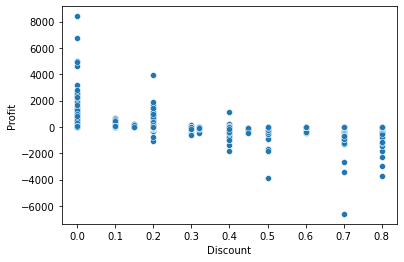

In [27]:
sns.scatterplot(x="Discount",y="Profit",data=df)

Due to discount our profit is reducing.

<AxesSubplot:xlabel='Discount', ylabel='Sales'>

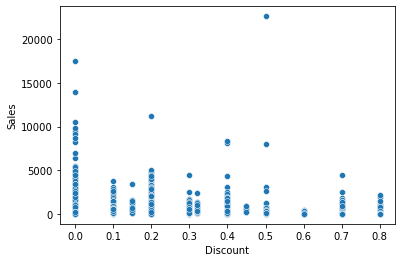

In [28]:
sns.scatterplot(x="Discount",y="Sales",data=df)

Discount does not have significant impact on sales. 

In [29]:
corr=df.corr()
corr

,Postal Code,Sales,Quantity,Discount,Profit
Postal Code,1.000000,-0.023854,0.012761,0.058443,-0.029961
Sales,-0.023854,1.000000,0.200795,-0.028190,0.479064
Quantity,0.012761,0.200795,1.000000,0.008623,0.066253
Discount,0.058443,-0.028190,0.008623,1.000000,-0.219487
Profit,-0.029961,0.479064,0.066253,-0.219487,1.000000


<AxesSubplot:>

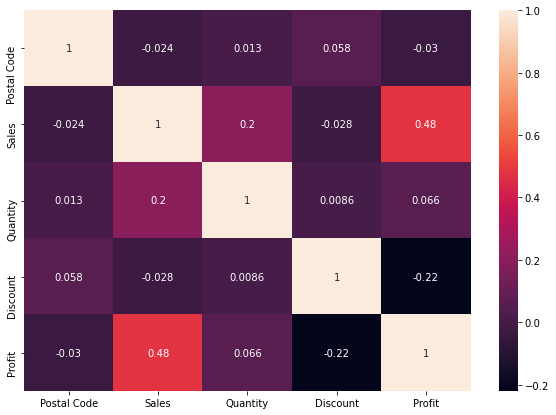

In [30]:
plt.figure(figsize=(10,7))
sns.heatmap(corr,annot=True)

Sales and Profit are Positively correlated.<br> 
Discount and Profit are Negatively correlated.<br>
Discount and Sales are Very less Negatively Correlated.<br>
So giving discount is not increasing our sales.

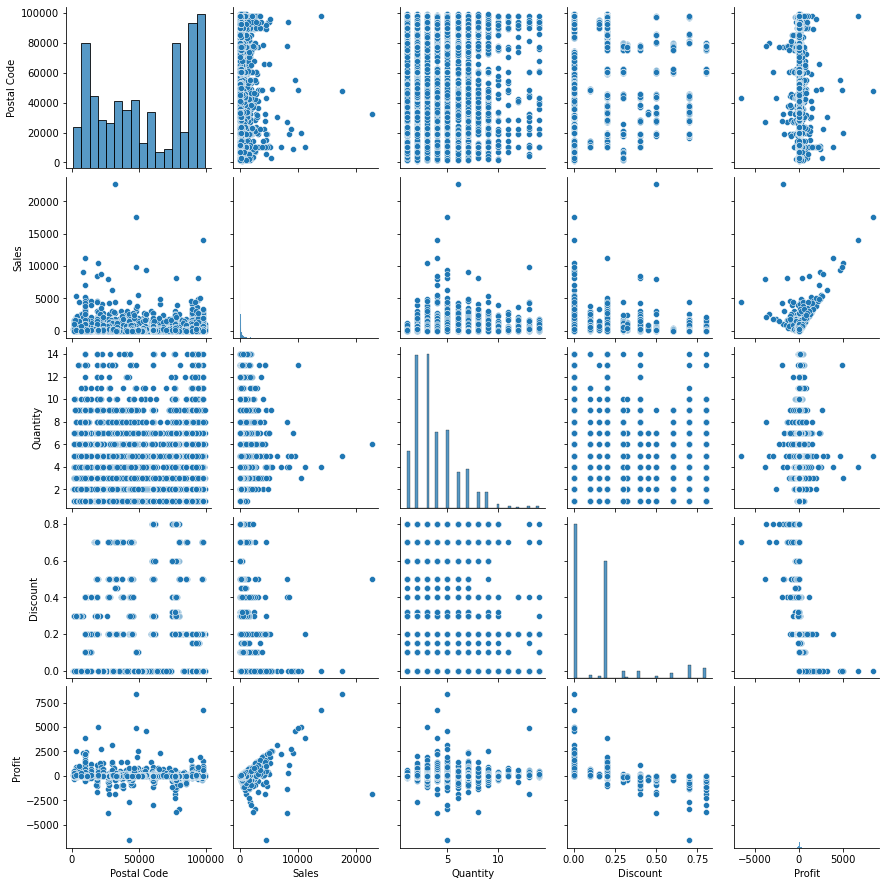

In [31]:
sns.pairplot(data=df)

On some postal codes we have very high sales.

In [32]:
max_sales=df.nlargest(100,["Sales"])
max_sales

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
2697,Standard Class,Home Office,United States,Jacksonville,Florida,32216,South,Technology,Machines,22638.480,6,0.5,-1811.0784
6826,Standard Class,Corporate,United States,Lafayette,Indiana,47905,Central,Technology,Copiers,17499.950,5,0.0,8399.9760
8153,First Class,Consumer,United States,Seattle,Washington,98115,West,Technology,Copiers,13999.960,4,0.0,6719.9808
2623,First Class,Home Office,United States,New York City,New York,10024,East,Technology,Copiers,11199.968,4,0.2,3919.9888
4190,Standard Class,Consumer,United States,Newark,Delaware,19711,East,Technology,Copiers,10499.970,3,0.0,5039.9856
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6010,Standard Class,Consumer,United States,Los Angeles,California,90049,West,Technology,Machines,2548.560,6,0.2,286.7130
7280,Standard Class,Consumer,United States,Columbia,Maryland,21044,East,Office Supplies,Binders,2541.980,2,0.0,1270.9900
263,Second Class,Corporate,United States,Houston,Texas,77036,Central,Technology,Machines,2519.958,7,0.4,-251.9958
7937,Standard Class,Corporate,United States,Brentwood,California,94513,West,Office Supplies,Appliances,2518.290,9,0.0,654.7554


In [33]:
df_state= df.groupby(['State'])[['Sales', 'Discount', 'Profit']].mean()
df_state.head(10)

,Sales,Discount,Profit
State,,,
Alabama,319.846557,0.000000,94.865989
Arizona,157.508933,0.303571,-15.303235
Arkansas,194.635500,0.000000,66.811452
California,228.729451,0.072764,38.171608
Colorado,176.418231,0.316484,-35.867351
Connecticut,163.223866,0.007317,42.823071
Delaware,285.948635,0.006250,103.930988
District of Columbia,286.502000,0.000000,105.958930
Florida,233.612815,0.299347,-8.875461


In [34]:
NYK_analysis=df.groupby('State')

Analysis on New York State

In [35]:
NYK_analysis.get_group("New York")["Category"].value_counts(ascending=False)

Office Supplies    684
Furniture          236
Technology         208
Name: Category, dtype: int64

In [36]:
NYK_analysis.get_group("New York")["Sub-Category"].value_counts(ascending=False)

Binders        179
Paper          150
Phones         109
Furnishings    100
Storage         98
Art             90
Chairs          76
Accessories     76
Labels          45
Appliances      44
Bookcases       32
Envelopes       32
Tables          28
Supplies        25
Fasteners       21
Machines        16
Copiers          7
Name: Sub-Category, dtype: int64

In [37]:
NYK_analysis.get_group("New York")[["Sales","Profit"]].sum()

Sales     310876.2710
Profit     74038.5486
dtype: float64

In [38]:
NYK_analysis.get_group("New York")["Ship Mode"].value_counts(ascending=False)

Standard Class    678
Second Class      209
First Class       179
Same Day           62
Name: Ship Mode, dtype: int64

In [39]:
df["Profit"].sort_values(ascending=False)

6826    8399.9760
8153    6719.9808
4190    5039.9856
9039    4946.3700
4098    4630.4755
          ...    
4991   -2929.4845
3011   -3399.9800
9774   -3701.8928
683    -3839.9904
7772   -6599.9780
Name: Profit, Length: 9994, dtype: float64

In [40]:
max_profit=df.nlargest(100,["Profit"])

Highest Profit on Single Delivery of items.

In [41]:
max_profit["Category"].value_counts()

Technology         56
Office Supplies    35
Furniture           9
Name: Category, dtype: int64

Furniture category is giving us least profit in Top Profitable deliveries.

In [42]:
max_sales=df.nlargest(100,["Sales"])

In [43]:
max_sales["Category"].value_counts()

Technology         51
Office Supplies    26
Furniture          23
Name: Category, dtype: int64

Although furniture giving us least profit, it has significant sales.

In [44]:
max_profit["Region"].value_counts()

East       39
West       25
Central    19
South      17
Name: Region, dtype: int64

In [45]:
max_sales["Region"].value_counts()

East       34
West       31
Central    18
South      17
Name: Region, dtype: int64

Although we have most west region buyers, Our more profitable buyers belogs 'East' region.

In [46]:
category_loss=df.groupby("Category")

In [47]:
category_loss.get_group("Technology")["Profit"].sum()

145454.9481

In [48]:
category_loss.get_group("Office Supplies")["Profit"].sum()

122490.8008

In [49]:
category_loss.get_group("Furniture")["Profit"].sum()

18451.272800000006

In [50]:
loss=df[df["Profit"]<0]
loss.head(10)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
14,Standard Class,Home Office,United States,Fort Worth,Texas,76106,Central,Office Supplies,Appliances,68.8100,5,0.80,-123.8580
15,Standard Class,Home Office,United States,Fort Worth,Texas,76106,Central,Office Supplies,Binders,2.5440,3,0.80,-3.8160
23,Second Class,Consumer,United States,Philadelphia,Pennsylvania,19140,East,Furniture,Chairs,71.3720,2,0.30,-1.0196
27,Standard Class,Consumer,United States,Philadelphia,Pennsylvania,19140,East,Furniture,Bookcases,3083.4300,7,0.50,-1665.0522
28,Standard Class,Consumer,United States,Philadelphia,Pennsylvania,19140,East,Office Supplies,Binders,9.6180,2,0.70,-7.0532
32,Standard Class,Consumer,United States,Philadelphia,Pennsylvania,19140,East,Office Supplies,Binders,6.8580,6,0.70,-5.7150
36,First Class,Corporate,United States,Richardson,Texas,75080,Central,Furniture,Furnishings,190.9200,5,0.60,-147.9630
38,Standard Class,Home Office,United States,Houston,Texas,77041,Central,Furniture,Bookcases,532.3992,3,0.32,-46.9764
39,Standard Class,Home Office,United States,Houston,Texas,77041,Central,Furniture,Chairs,212.0580,3,0.30,-15.1470


In [51]:
loss.shape

(1871, 13)

In [52]:
loss["Ship Mode"].value_counts(),df["Ship Mode"].value_counts()

(Standard Class    1173
 Second Class       307
 First Class        293
 Same Day            98
 Name: Ship Mode, dtype: int64,
 Standard Class    5968
 Second Class      1945
 First Class       1538
 Same Day           543
 Name: Ship Mode, dtype: int64)

Ship mode is not having much significant impact on loss.

In [53]:
loss["Profit"].sum()

-156131.28569999998

This is total loss of our retail shop.

In [54]:
loss["Category"].value_counts()

Office Supplies    886
Furniture          714
Technology         271
Name: Category, dtype: int64

In [55]:
loss_category=loss.groupby("Category")

In [56]:
loss_category.get_group("Office Supplies")["Profit"].sum()

-56615.258499999996

In [57]:
loss_category.get_group("Furniture")["Profit"].sum()

-60936.109

In [58]:
loss_category.get_group("Technology")["Profit"].sum()

-38579.9182

Furniture category has given maximum loss.

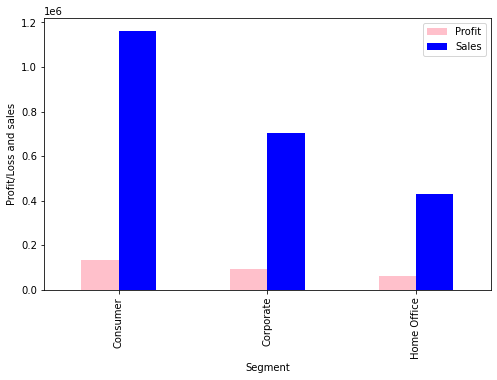

In [59]:
df.groupby('Segment')[['Profit','Sales']].sum().plot.bar(color=['pink','blue'],figsize=(8,5))
plt.ylabel('Profit/Loss and sales')
plt.show()

Profit and sales are maximum in consumer segment<br> 
and minimum in Home Office segment

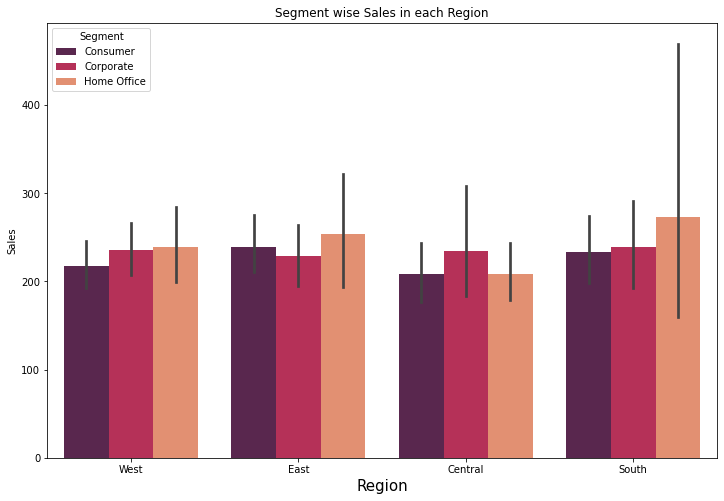

In [60]:
plt.figure(figsize=(12,8))
plt.title('Segment wise Sales in each Region')
sns.barplot(x='Region',y='Sales',data=df,hue='Segment',order=df['Region'].value_counts().index,palette='rocket')
plt.xlabel('Region',fontsize=15)
plt.show()



Segment wise sales are almost same in every region


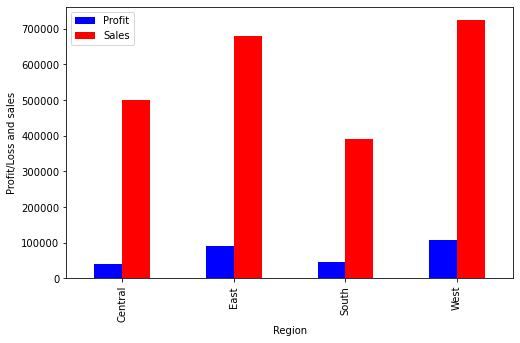

In [61]:
df.groupby('Region')[['Profit','Sales']].sum().plot.bar(color=['blue','red'],figsize=(8,5))
plt.ylabel('Profit/Loss and sales')
plt.show()

East and West Regions have High Sale and High Profit. 

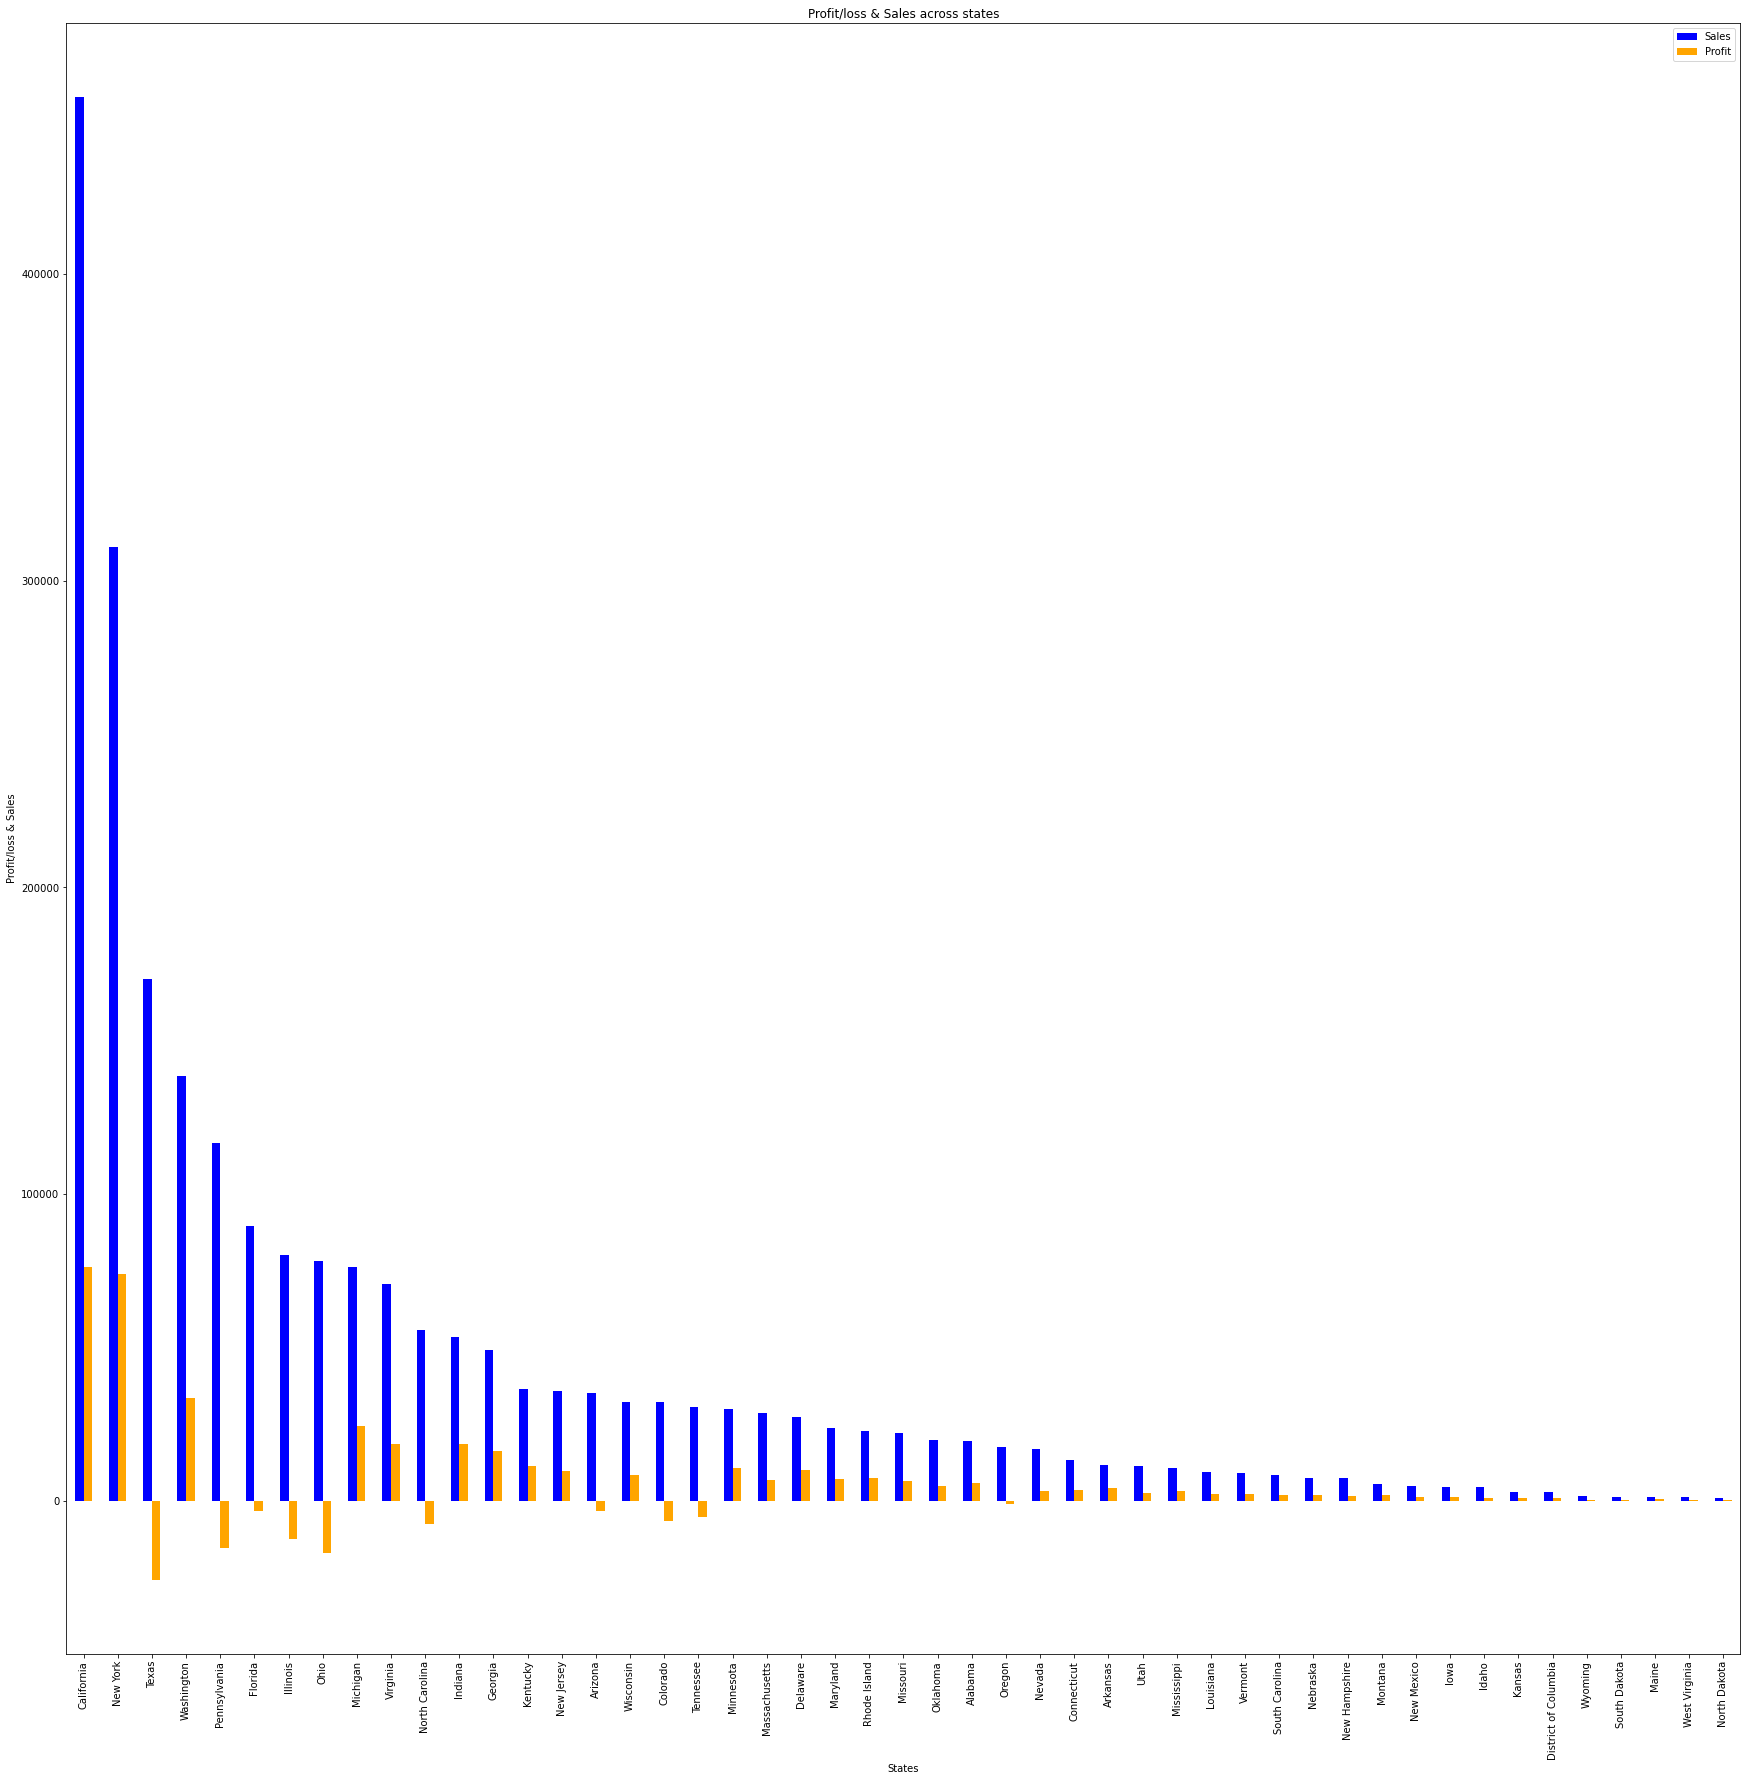

In [62]:
ps = df.groupby('State')[['Sales','Profit']].sum().sort_values(by='Sales',ascending=False)
ps[:].plot.bar(color=['blue','orange'],figsize=(30,30))
plt.title('Profit/loss & Sales across states')
plt.xlabel('States')
plt.ylabel('Profit/loss & Sales')
plt.show()

California and New York states gives high and high profit.<br>
Texas, Ohio and Pennysylvania are states with sales but still we faced high loss.

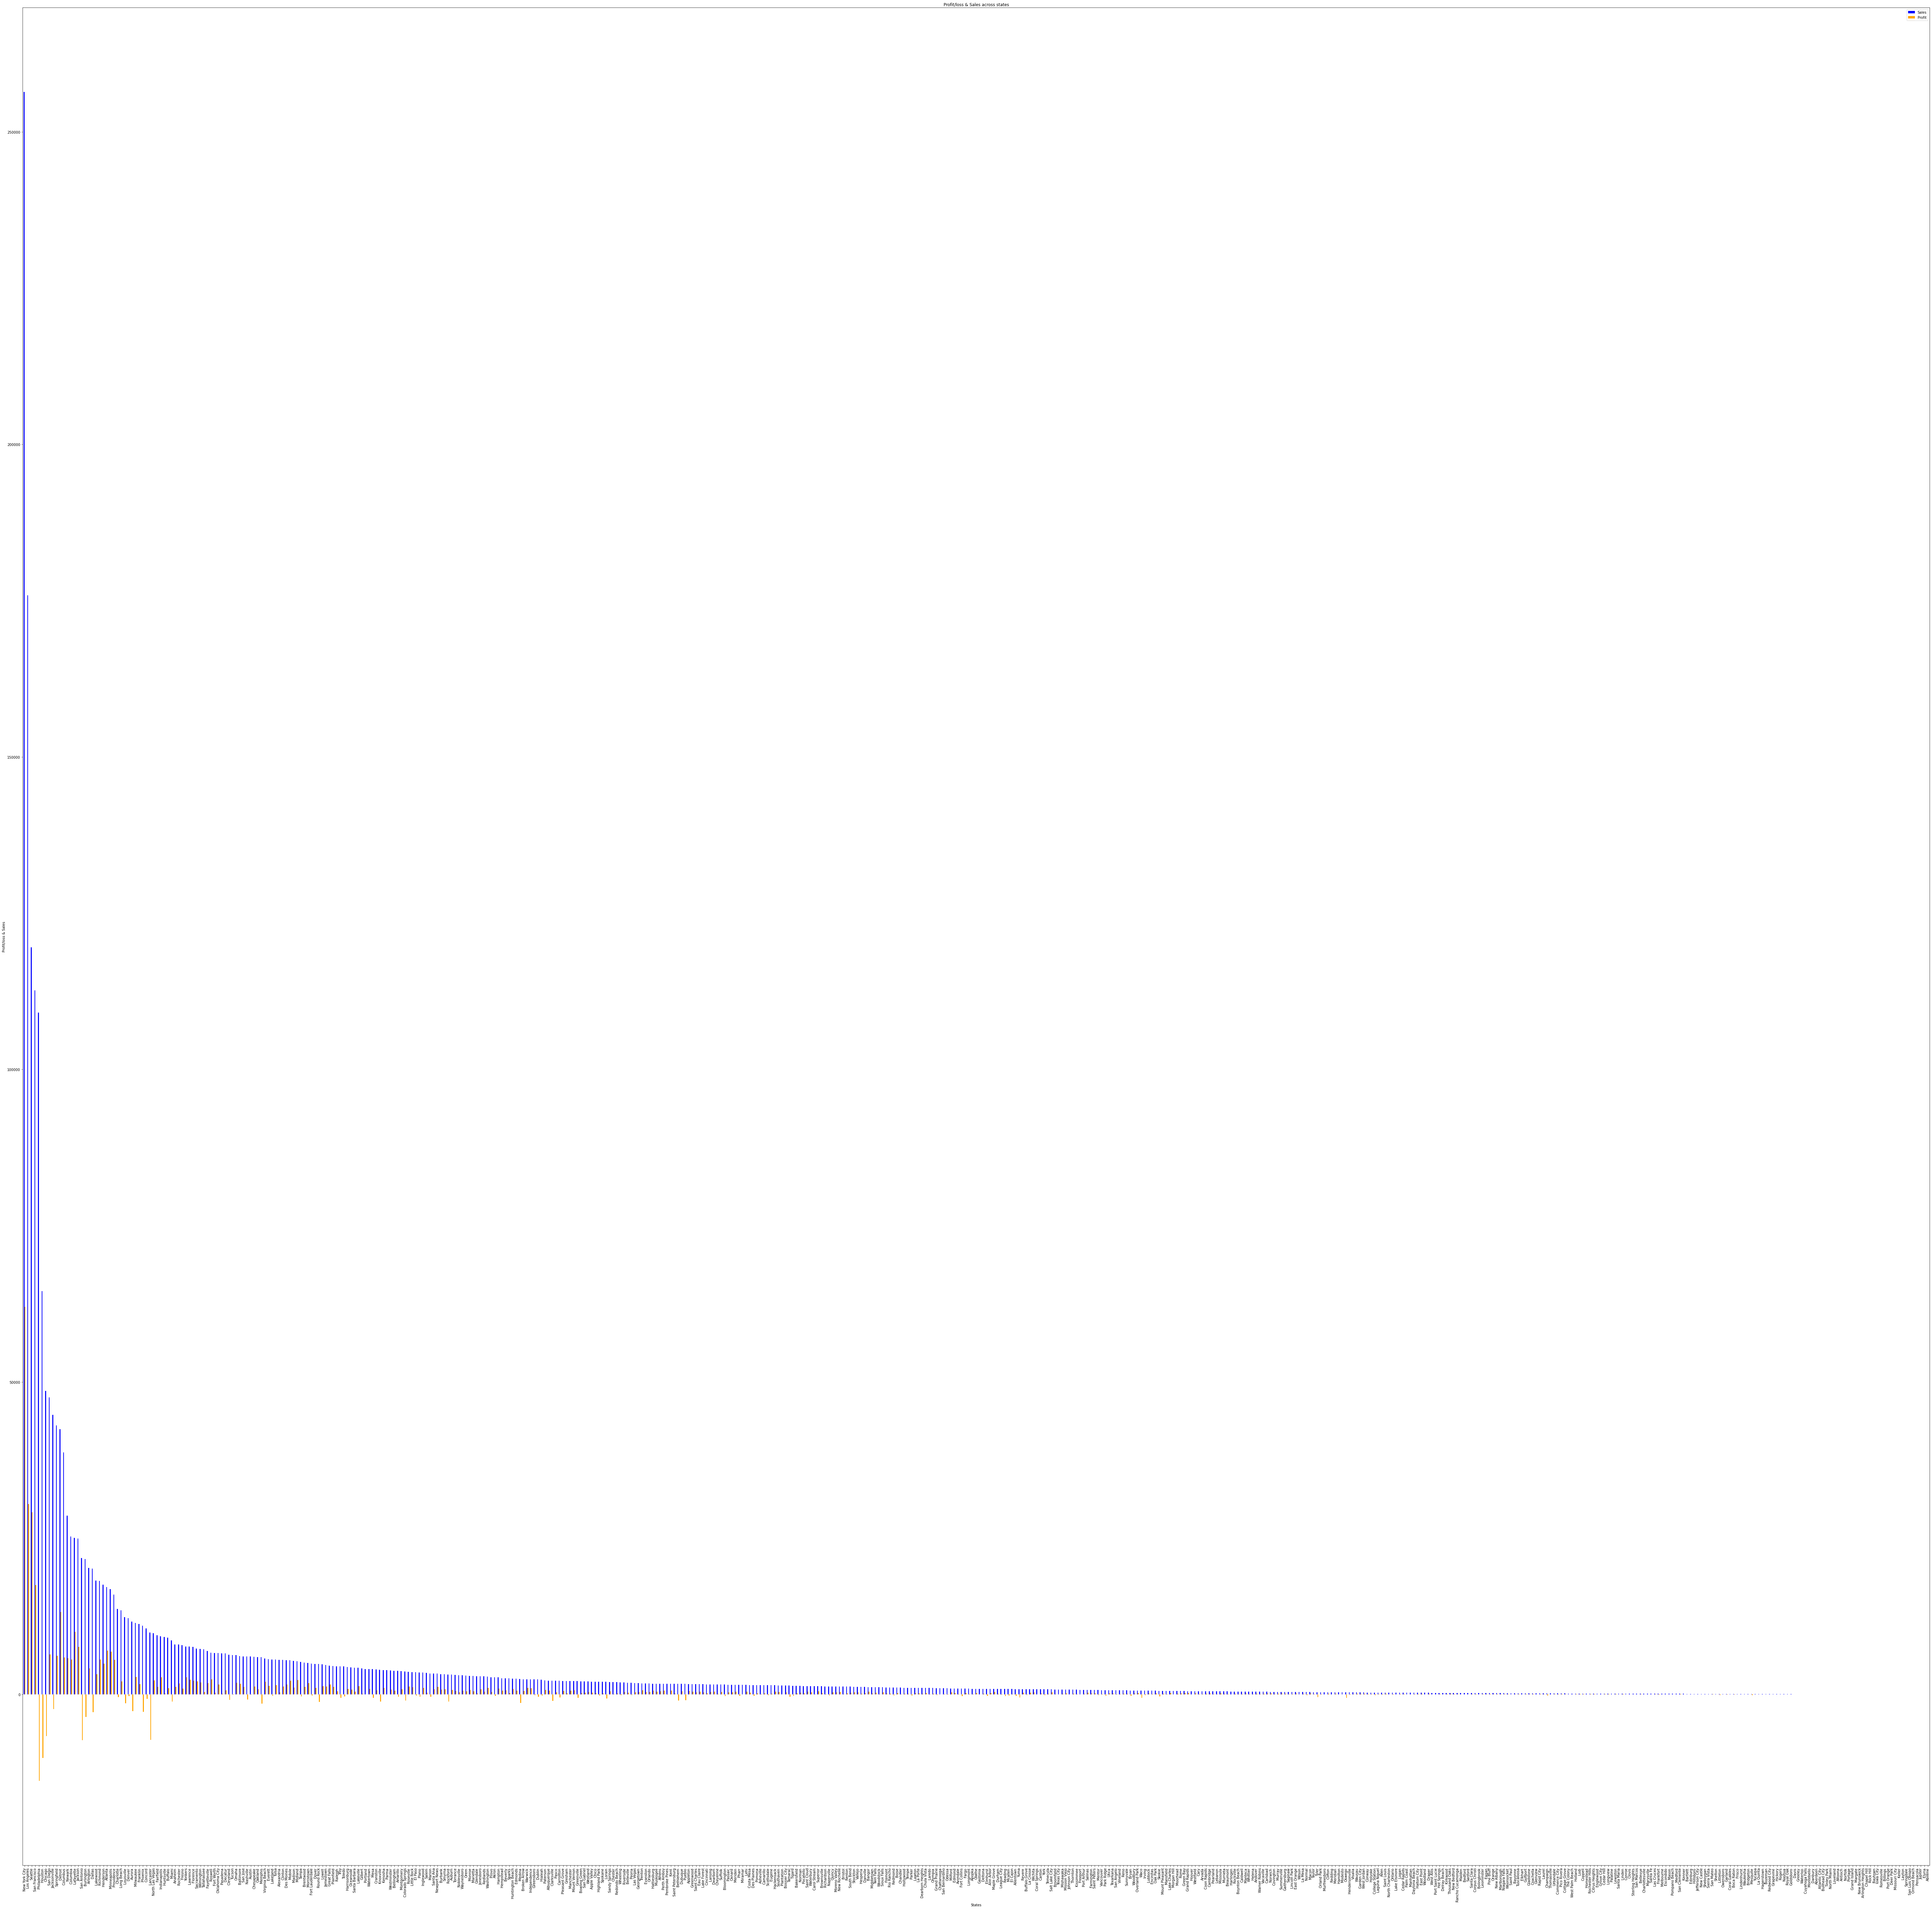

In [63]:
ps = df.groupby('City')[['Sales','Profit']].sum().sort_values(by='Sales',ascending=False)
ps[:].plot.bar(color=['blue','orange'],figsize=(100,100))
plt.title('Profit/loss & Sales across states')
plt.xlabel('States')
plt.ylabel('Profit/loss & Sales')
plt.show()

From visualization we see 'Philadelphia', 'Houston', 'Chicago', 'San Antonio', 'Lancaster' are  Cities with maximun loss 

In [64]:
city_loss=loss.groupby("City")

In [65]:
d={}
for i in loss["City"].unique():
    d[i]=city_loss.get_group(i)["Profit"].sum()

In [66]:
sorted(d,key=d.get,reverse=False)[:5] 

['Philadelphia', 'Houston', 'Chicago', 'San Antonio', 'Lancaster']

'Philadelphia', 'Houston', 'Chicago', 'San Antonio', 'Lancaster' are Cities with maximun loss 

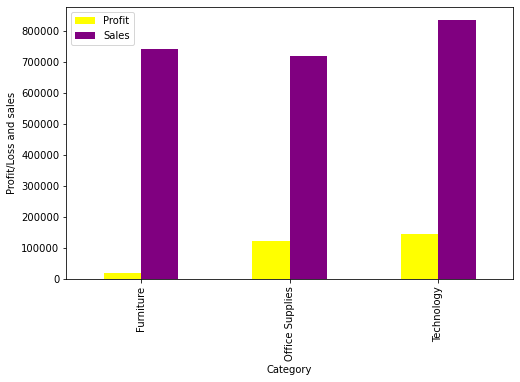

In [67]:
df.groupby('Category')[['Profit','Sales']].sum().plot.bar(color=['yellow','purple'],figsize=(8,5))
plt.ylabel('Profit/Loss and sales')
plt.show()

Technological products have high sale and high profit.<br>
And Furniture products have High sale but very less profit.

In [68]:
df[["Quantity","Category"]].value_counts()

Quantity  Category       
2         Office Supplies    1461
3         Office Supplies    1414
5         Office Supplies     752
4         Office Supplies     713
1         Office Supplies     537
3         Furniture           534
2         Furniture           503
3         Technology          461
2         Technology          438
7         Office Supplies     378
6         Office Supplies     363
5         Furniture           253
4         Furniture           247
          Technology          231
5         Technology          225
1         Furniture           193
          Technology          169
9         Office Supplies     158
8         Office Supplies     154
6         Furniture           121
7         Furniture           115
          Technology          113
6         Technology           88
8         Furniture            58
9         Furniture            58
8         Technology           45
9         Technology           42
10        Office Supplies      33
11        Office Suppl

Technology category items are ordered with high Quantity.

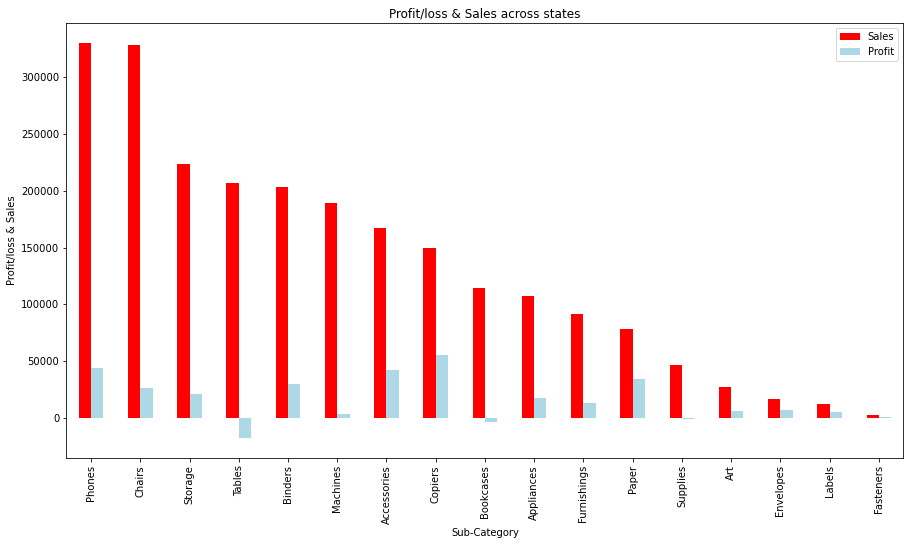

In [69]:
ps = df.groupby('Sub-Category')[['Sales','Profit']].sum().sort_values(by='Sales',ascending=False)
ps[:].plot.bar(color=['red','lightblue'],figsize=(15,8))
plt.title('Profit/loss & Sales across states')
plt.xlabel('Sub-Category')
plt.ylabel('Profit/loss & Sales')
plt.show()

Accessories and Copiers are giving significant profit with respective its sales.<br>
On Machines with high sale we have very less profit.

# Conclusion:

1.Although more frequent buyers are from office supplies category, we have more sale in technology category.<br>
2.Technology category items gives more profit. And these items are mostly ordered in high Quantity.<br>
3.Furniture category is not giving significant profit. And it has given maximum overall loss.<br>
4.'Philadelphia', 'Houston', 'Chicago', 'San Antonio', 'Lancaster' are cities of main concern.
Even with high sales we are facing huge loss there.<br>
5.On Tables we are facing significant loss.<br>
6.Accessories and Copiers are giving significant profit with respective its sales.So we can increase its sale for more profit.<br>
7.On Machines with high sale we have very less profit.